##  Importing the Dataset

We are loading the Industrial IoT synthetic dataset, which includes sensor data and machine status information for predictive maintenance and failure forecasting tasks.


In [41]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("canozensoy/industrial-iot-dataset-synthetic")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/industrial-iot-dataset-synthetic


# 🧪 Exploratory Data Analysis (EDA)

In this section, we explore the dataset to understand its structure, features, and patterns.  
We check the target variable, look at feature distributions, and analyze correlations.  
This helps us prepare the data for machine learning models.


## 2. Listing Dataset Files

We list the available files in the dataset directory to locate the correct CSV file.


In [42]:
import os
os.listdir("/kaggle/input/industrial-iot-dataset-synthetic")


['factory_sensor_simulator_2040.csv']

## 3. Reading the CSV File 

We load the main dataset file into a pandas DataFrame for analysis.


In [43]:
import pandas as pd

df = pd.read_csv("/kaggle/input/industrial-iot-dataset-synthetic/factory_sensor_simulator_2040.csv")
df.head()


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,Machine_ID,Machine_Type,Installation_Year,Operational_Hours,Temperature_C,Vibration_mms,Sound_dB,Oil_Level_pct,Coolant_Level_pct,Power_Consumption_kW,...,Failure_History_Count,AI_Supervision,Error_Codes_Last_30_Days,Remaining_Useful_Life_days,Failure_Within_7_Days,Laser_Intensity,Hydraulic_Pressure_bar,Coolant_Flow_L_min,Heat_Index,AI_Override_Events
0,MC_000000,Mixer,2027,81769,73.43,12.78,83.72,36.76,68.74,84.95,...,5,True,3,162.0,False,NaN,NaN,NaN,NaN,2
1,MC_000001,Industrial_Chiller,2032,74966,58.32,14.99,77.04,100.00,62.13,154.61,...,2,True,4,147.0,False,NaN,NaN,40.92,NaN,2
2,MC_000002,Pick_and_Place,2003,94006,49.63,23.78,69.08,42.96,35.96,51.90,...,1,True,6,0.0,True,NaN,NaN,NaN,NaN,2
3,MC_000003,Vision_System,2007,76637,63.73,12.38,85.58,94.90,48.94,75.61,...,1,False,4,161.0,False,NaN,NaN,NaN,NaN,0
4,MC_000004,Shuttle_System,2016,20870,42.77,4.42,96.72,47.56,53.78,224.93,...,2,False,1,765.0,False,NaN,NaN,NaN,NaN,0


In [44]:
import pandas as pd

df = pd.read_csv("/kaggle/input/industrial-iot-dataset-synthetic/factory_sensor_simulator_2040.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Machine_ID                  500000 non-null  object 
 1   Machine_Type                500000 non-null  object 
 2   Installation_Year           500000 non-null  int64  
 3   Operational_Hours           500000 non-null  int64  
 4   Temperature_C               500000 non-null  float64
 5   Vibration_mms               500000 non-null  float64
 6   Sound_dB                    500000 non-null  float64
 7   Oil_Level_pct               500000 non-null  float64
 8   Coolant_Level_pct           500000 non-null  float64
 9   Power_Consumption_kW        500000 non-null  float64
 10  Last_Maintenance_Days_Ago   500000 non-null  int64  
 11  Maintenance_History_Count   500000 non-null  int64  
 12  Failure_History_Count       500000 non-null  int64  
 13  AI_Supervision

In [45]:
df.describe()

,Installation_Year,Operational_Hours,Temperature_C,Vibration_mms,Sound_dB,Oil_Level_pct,Coolant_Level_pct,Power_Consumption_kW,Last_Maintenance_Days_Ago,Maintenance_History_Count,Failure_History_Count,Error_Codes_Last_30_Days,Remaining_Useful_Life_days,Laser_Intensity,Hydraulic_Pressure_bar,Coolant_Flow_L_min,Heat_Index,AI_Override_Events
count,500000.000000,500000.000000,500000.000000,500000.00000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,15156.000000,30340.000000,45624.000000,45214.000000,500000.000000
mean,2019.962360,50012.424764,59.997682,9.99114,75.003477,69.456568,64.114159,149.922161,182.257866,5.003128,2.000588,3.000840,452.422338,74.995513,119.917514,39.984794,499.760966,0.602098
std,11.829812,28861.849078,14.986973,4.99953,9.990791,18.847444,23.152998,79.955937,105.552537,2.238043,1.413087,1.730541,288.971269,10.035133,15.017048,9.989653,50.012057,1.203647
min,2000.000000,0.000000,-15.730000,-17.82000,23.650000,0.000000,0.000000,-222.740000,0.000000,0.000000,0.000000,0.000000,0.000000,34.970000,52.680000,-0.160000,296.440000,0.000000
25%,2010.000000,25055.000000,49.890000,6.62000,68.270000,56.540000,48.130000,96.090000,91.000000,3.000000,1.000000,2.000000,200.000000,68.250000,109.820000,33.200000,465.940000,0.000000
50%,2020.000000,49973.000000,60.000000,10.00000,75.000000,70.030000,65.010000,149.950000,182.000000,5.000000,2.000000,3.000000,451.000000,74.950000,119.860000,40.030000,499.770000,0.000000
75%,2030.000000,74995.000000,70.050000,13.36000,81.730000,83.540000,81.840000,203.900000,274.000000,6.000000,3.000000,4.000000,700.000000,81.682500,130.072500,46.750000,533.307500,1.000000
max,2040.000000,100000.000000,127.330000,32.47000,120.700000,100.000000,100.000000,544.200000,365.000000,18.000000,12.000000,13.000000,1133.000000,114.320000,185.380000,80.790000,694.170000,11.000000


## 4. Checking for Missing Values

We check each column to see if there are any missing values (NaN) that need to be cleaned or imputed.


In [46]:
df.isnull().sum()


Machine_ID                         0
Machine_Type                       0
Installation_Year                  0
Operational_Hours                  0
Temperature_C                      0
Vibration_mms                      0
Sound_dB                           0
Oil_Level_pct                      0
Coolant_Level_pct                  0
Power_Consumption_kW               0
Last_Maintenance_Days_Ago          0
Maintenance_History_Count          0
Failure_History_Count              0
AI_Supervision                     0
Error_Codes_Last_30_Days           0
Remaining_Useful_Life_days         0
Failure_Within_7_Days              0
Laser_Intensity               484844
Hydraulic_Pressure_bar        469660
Coolant_Flow_L_min            454376
Heat_Index                    454786
AI_Override_Events                 0
dtype: int64

## 5. Descriptive Statistics

We use basic statistics like mean, standard deviation, and min/max values to understand the distribution and scale of each feature.


In [47]:
df.describe().T.sort_values("max", ascending=False)


,count,mean,std,min,25%,50%,75%,max
Operational_Hours,500000.0,50012.424764,28861.849078,0.00,25055.00,49973.00,74995.0000,100000.00
Installation_Year,500000.0,2019.962360,11.829812,2000.00,2010.00,2020.00,2030.0000,2040.00
Remaining_Useful_Life_days,500000.0,452.422338,288.971269,0.00,200.00,451.00,700.0000,1133.00
Heat_Index,45214.0,499.760966,50.012057,296.44,465.94,499.77,533.3075,694.17
Power_Consumption_kW,500000.0,149.922161,79.955937,-222.74,96.09,149.95,203.9000,544.20
Last_Maintenance_Days_Ago,500000.0,182.257866,105.552537,0.00,91.00,182.00,274.0000,365.00
Hydraulic_Pressure_bar,30340.0,119.917514,15.017048,52.68,109.82,119.86,130.0725,185.38
Temperature_C,500000.0,59.997682,14.986973,-15.73,49.89,60.00,70.0500,127.33
Sound_dB,500000.0,75.003477,9.990791,23.65,68.27,75.00,81.7300,120.70
Laser_Intensity,15156.0,74.995513,10.035133,34.97,68.25,74.95,81.6825,114.32


## 🎯 Target Variable Distribution (Classification)

This chart shows how many machines failed or did not fail within 7 days. It helps us see if the classes are balanced.


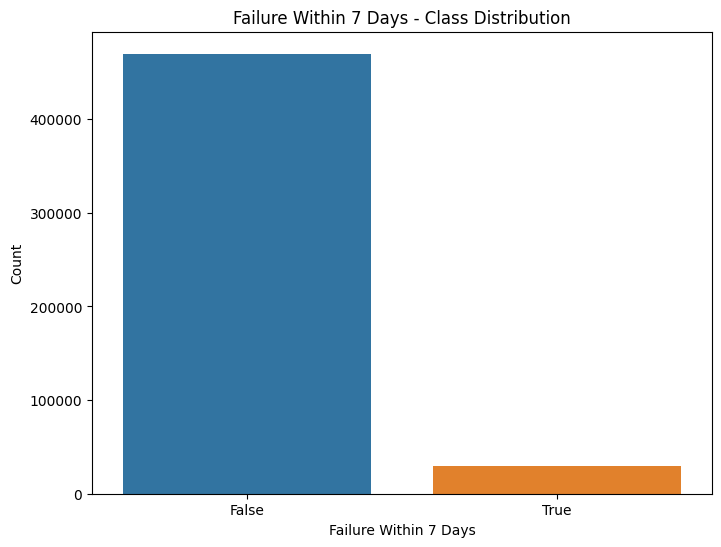

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(x='Failure_Within_7_Days', data=df)
plt.title('Failure Within 7 Days - Class Distribution')
plt.xlabel('Failure Within 7 Days')
plt.ylabel('Count')
plt.show()


## 🔗 Correlation Matrix

This heatmap shows how features are related to each other. Strong correlations can help us choose important features.


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


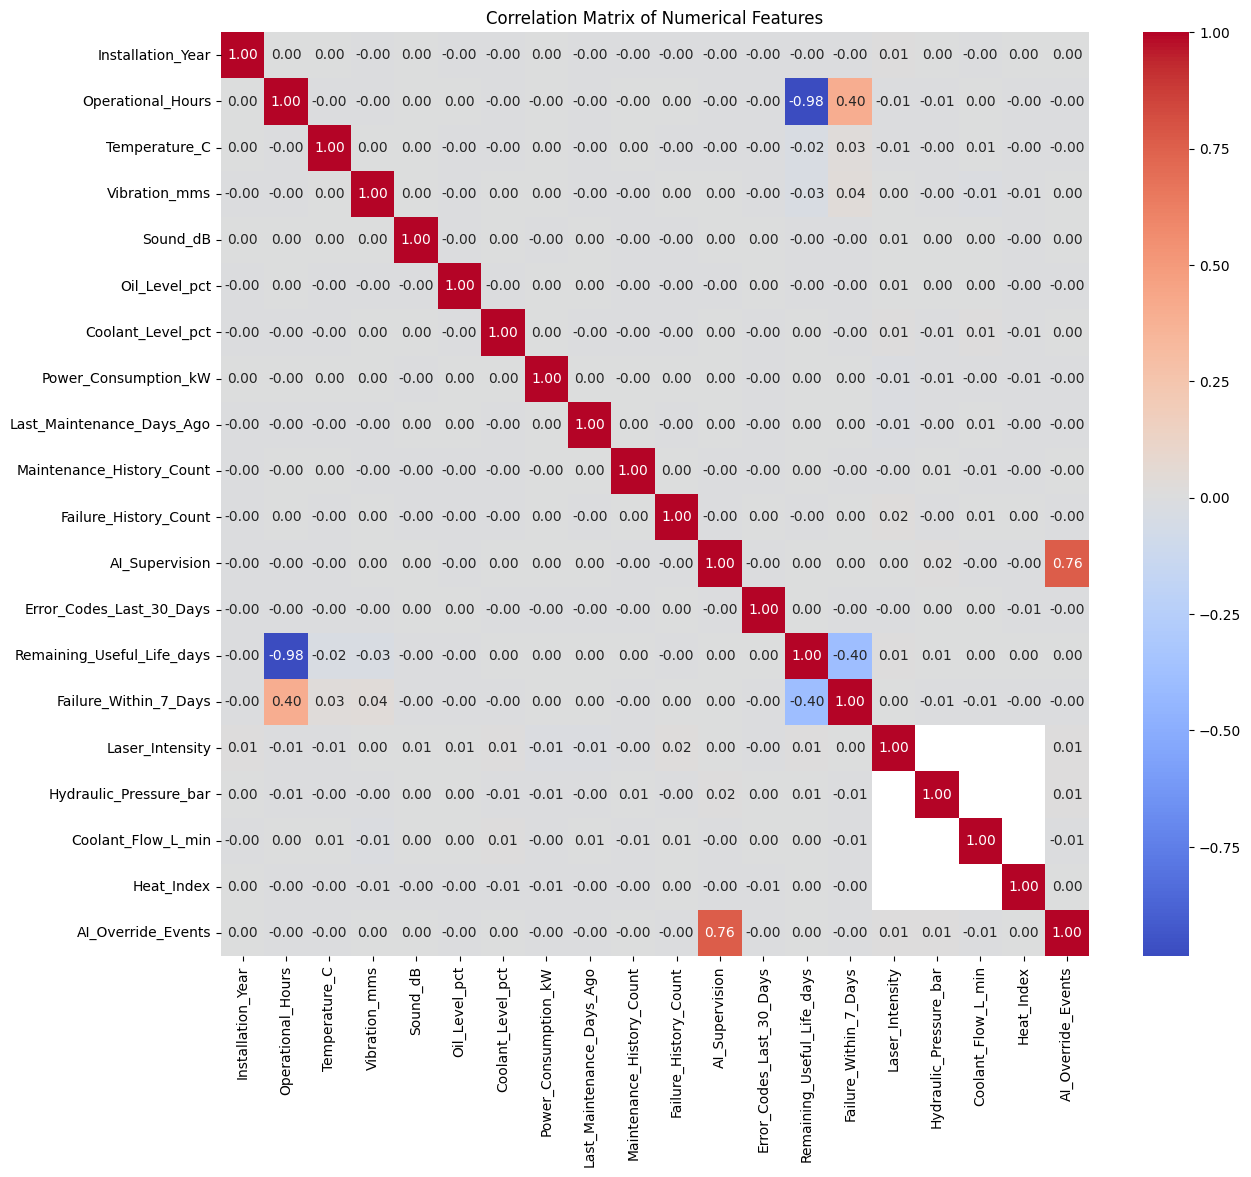

In [49]:
plt.figure(figsize=(14, 12))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


## 📈 Sensor Data Distributions

These histograms show how sensor values like temperature, vibration, and power are distributed. We can spot outliers or unusual patterns.


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


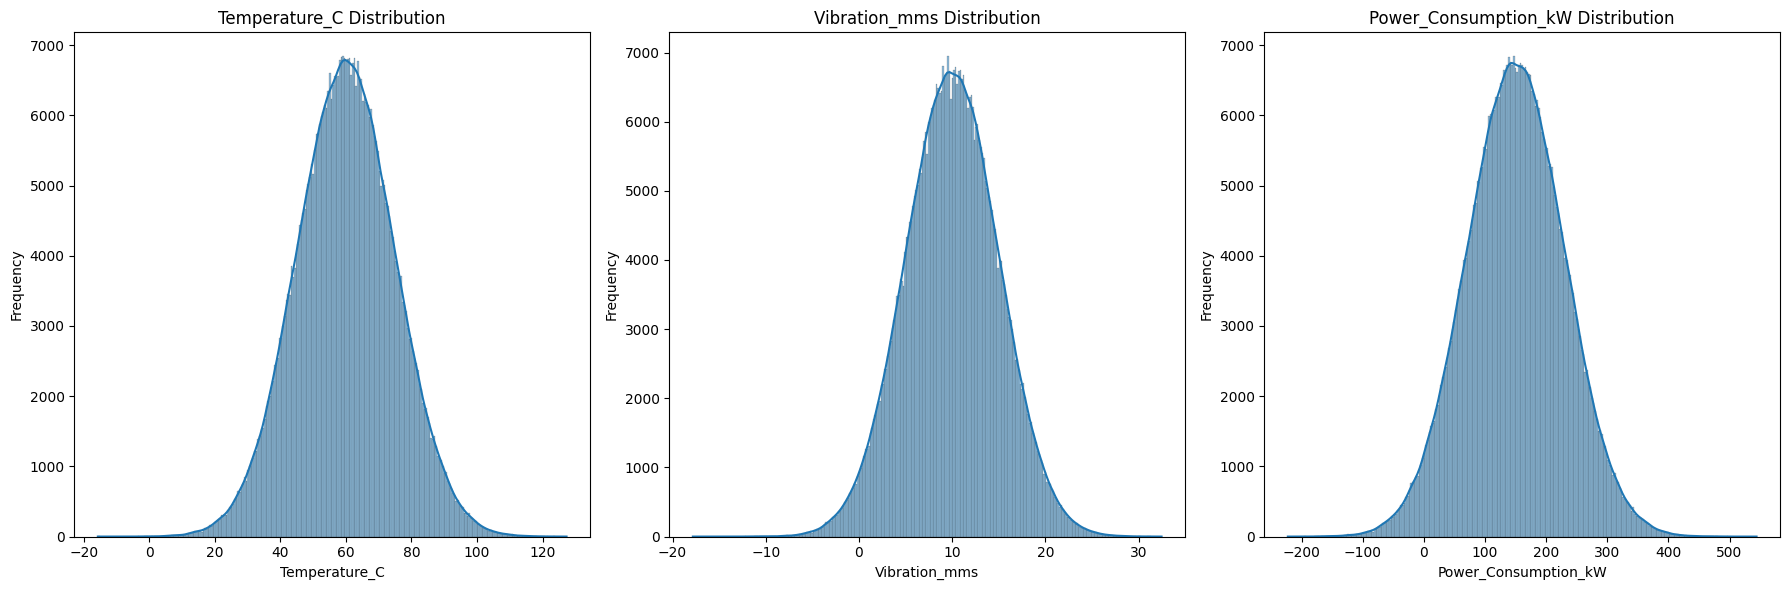

In [50]:
sensor_features = ['Temperature_C', 'Vibration_mms', 'Power_Consumption_kW']

plt.figure(figsize=(18, 6))
for i, feature in enumerate(sensor_features, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'{feature} Distribution')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


###  Distribution of Numerical Features

To understand the data distribution, we plot histograms of all numerical features. This helps identify skewness, outliers, or unusual patterns in the data that may require transformation or further analysis.


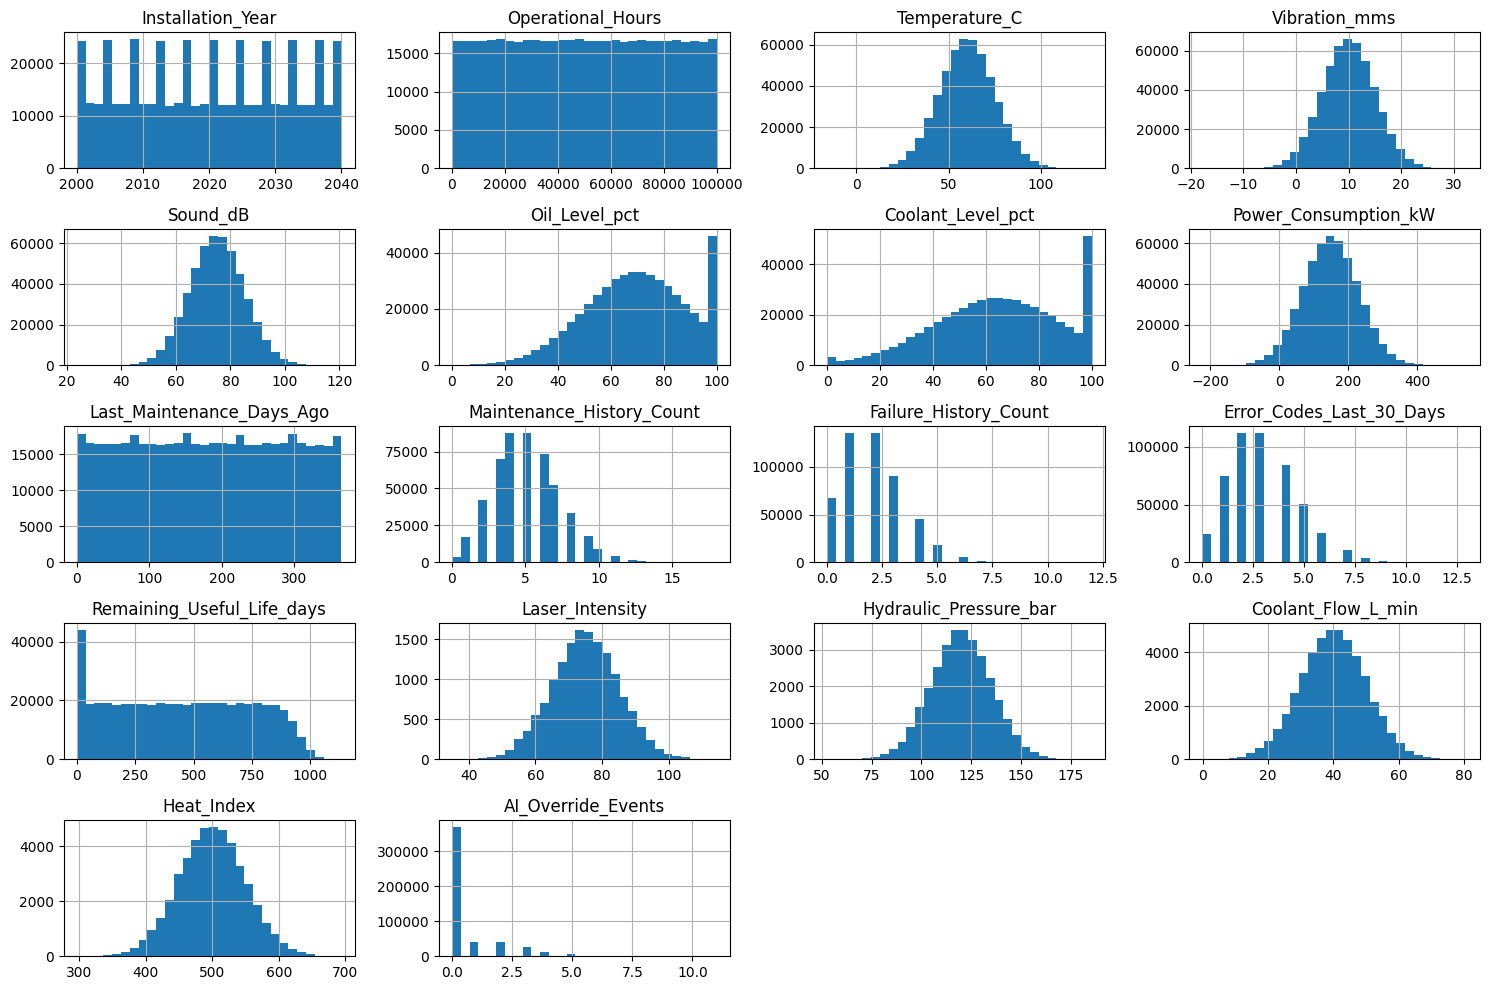

In [51]:
# Plot histograms of numerical features
numerical = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical].hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()


# 🧹 Data Preprocessing for Regression and Classification

We prepare the dataset for both tasks:

- Regression: Predicting `Remaining_Useful_Life_days`
- Classification: Predicting `Failure_Within_7_Days`

Steps:
- Drop columns with too many missing values
- Fill remaining missing values with mean
- Encode categorical features
- Normalize numerical features
- Split into train and test sets


In [52]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


## 1. Copy data for regression

We drop the classification target and keep only the regression data.


In [53]:
df_reg = df.copy()
df_reg = df_reg.drop(columns=["Failure_Within_7_Days"])

print("Regression dataset shape:", df_reg.shape)


Regression dataset shape: (500000, 21)


## 2. Handle missing values

Drop columns with too many missing values.

Fill missing numeric values with the mean.

Fill missing categorical values with the most common value.


In [54]:
threshold = len(df_reg) * 0.8
df_reg = df_reg.dropna(thresh=threshold, axis=1)

for col in df_reg.select_dtypes(include=['float64', 'int64']).columns:
    df_reg[col] = df_reg[col].fillna(df_reg[col].mean())

for col in df_reg.select_dtypes(include=['object']).columns:
    df_reg[col] = df_reg[col].fillna(df_reg[col].mode()[0])


## 3. Encode categorical variables

Convert text columns to numbers using label encoding.


In [55]:
label_encoders = {}
for col in df_reg.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_reg[col] = le.fit_transform(df_reg[col])
    label_encoders[col] = le


## 4. Scale numeric features

Normalize all features except the target using Min-Max scaling.


In [56]:
scaler = MinMaxScaler()

features = df_reg.drop(columns=["Remaining_Useful_Life_days"])
features_scaled = scaler.fit_transform(features)

X = pd.DataFrame(features_scaled, columns=features.columns)
y = df_reg["Remaining_Useful_Life_days"]


## 5. Split data into training and testing sets

We keep 20% of data for testing.


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train data shape:", X_train.shape)
print("Test data shape:", X_test.shape)


Train data shape: (400000, 16)
Test data shape: (100000, 16)


# Data Preprocessing for Classification

In this step, we prepare the data for the classification task: predicting **Failure_Within_7_Days**.

We will:
- Create a copy of the dataset
- Drop the regression target column (**Remaining_Useful_Life_days**)
- Handle missing values
- Encode categorical variables
- Normalize numerical features
- Split the data into training and test sets


In [58]:
df_clf = df.copy()
df_clf = df_clf.drop(columns=["Remaining_Useful_Life_days"])
print("Classification dataset shape:", df_clf.shape)


Classification dataset shape: (500000, 21)


## Handling Missing Values

We check for missing values in the dataset. For numerical columns, we fill missing values with the median.
For categorical columns, we fill missing values with the mode (most common value).


In [59]:
threshold = len(df_clf) * 0.8
df_clf = df_clf.dropna(thresh=threshold, axis=1)

for col in df_clf.select_dtypes(include=['float64', 'int64']).columns:
    df_clf[col] = df_clf[col].fillna(df_clf[col].mean())

for col in df_clf.select_dtypes(include=['object']).columns:
    df_clf[col] = df_clf[col].fillna(df_clf[col].mode()[0])


### Step 3: Encode categorical variables
Convert text columns to numbers using label encoding.


In [60]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in df_clf.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_clf[col] = le.fit_transform(df_clf[col])
    label_encoders[col] = le


### Step 4: Scale numeric features
Normalize all features except the target using Min-Max scaling.


In [61]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
features = df_clf.drop(columns=["Failure_Within_7_Days"])
features_scaled = scaler.fit_transform(features)

X = pd.DataFrame(features_scaled, columns=features.columns)
y = df_clf["Failure_Within_7_Days"]


### Step 5: Split data into training and testing sets
We keep 20% of data for testing.


In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train data shape:", X_train.shape)
print("Test data shape:", X_test.shape)


Train data shape: (400000, 16)
Test data shape: (100000, 16)


### 📊 Linear Regression (Baseline)
This is a simple model to predict the remaining useful life of machines.  
It helps us understand how well a basic model performs.


In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

print("Linear Regression Performance:")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_lr)}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_lr)}")
print(f"R^2 Score: {r2_score(y_test, y_pred_lr)}")


Linear Regression Performance:
Mean Squared Error (MSE): 0.04715941444502816
Mean Absolute Error (MAE): 0.1275975292543845
R^2 Score: 0.1585864068083952


### 🧪 XGBoost with 10% Training Data
To speed up training, we use only 10% of the training data.  
This helps test the model faster while still getting useful results.


In [64]:
# Sample 10% of the training data
X_train_small = X_train.sample(frac=0.1, random_state=42)
y_train_small = y_train.loc[X_train_small.index]

# Train XGBoost model
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

xgb_model = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_small, y_train_small)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Regressor Performance (10% Training Data):")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_xgb)}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_xgb)}")
print(f"R^2 Score: {r2_score(y_test, y_pred_xgb)}")


XGBoost Regressor Performance (10% Training Data):
Mean Squared Error (MSE): 0.02574678137898445
Mean Absolute Error (MAE): 0.04982651397585869
R^2 Score: 0.5406284902241736


### 📊 Model Performance Comparison

This bar chart compares the performance of two models:
- **Linear Regression**
- **XGBoost Regressor (trained with 10% of data)**

Metrics used:
- **MSE (Mean Squared Error)** – lower is better
- **MAE (Mean Absolute Error)** – lower is better
- **R² Score** – higher is better

XGBoost clearly outperforms Linear Regression in all metrics.


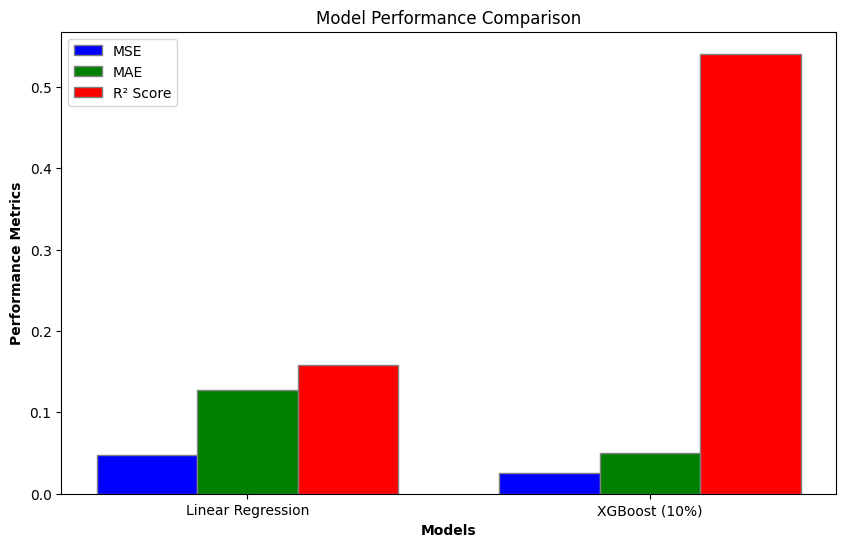

In [65]:
import matplotlib.pyplot as plt
import numpy as np

# Performance metrics
models = ['Linear Regression', 'XGBoost (10%)']
mse = [0.0471, 0.0257]
mae = [0.1276, 0.0498]
r2 = [0.1586, 0.5406]

# Bar width
bar_width = 0.25

# Positions of the bars on the x-axis
r1 = np.arange(len(models))
r2_pos = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2_pos]

# Create the bar chart
plt.figure(figsize=(10, 6))

plt.bar(r1, mse, color='blue', width=bar_width, edgecolor='grey', label='MSE')
plt.bar(r2_pos, mae, color='green', width=bar_width, edgecolor='grey', label='MAE')
plt.bar(r3, r2, color='red', width=bar_width, edgecolor='grey', label='R² Score')

# Add labels and title
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(models))], models)
plt.ylabel('Performance Metrics', fontweight='bold')
plt.title('Model Performance Comparison')
plt.legend()

# Show the plot
plt.show()


### 📘 Logistic Regression
This is a simple and fast model for binary classification.  
We use it to predict if a machine will fail within 7 days.


In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)

print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg)}")
print(f"Precision: {precision_score(y_test, y_pred_log_reg)}")
print(f"Recall: {recall_score(y_test, y_pred_log_reg)}")
print(f"F1 Score: {f1_score(y_test, y_pred_log_reg)}")


Logistic Regression Performance:
Accuracy: 0.96462
Precision: 0.7195431472081218
Recall: 0.6659395973154363
F1 Score: 0.6917044266294877


### 🌲 Random Forest Classifier
This is a more powerful model that uses many decision trees.  
It usually gives better results than simple models.


In [67]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)

print("Random Forest Classifier Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"Precision: {precision_score(y_test, y_pred_rf)}")
print(f"Recall: {recall_score(y_test, y_pred_rf)}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf)}")


Random Forest Classifier Performance:
Accuracy: 0.96329
Precision: 0.7092704333516182
Recall: 0.6508389261744967
F1 Score: 0.6787995450170619


 ### 📊 Classification Model Performance Comparison

This chart compares two classification models:
- **Logistic Regression**
- **Random Forest Classifier**

Metrics used:
- **Accuracy** – overall correctness
- **Precision** – how many predicted positives are actually positive
- **Recall** – how many actual positives were correctly predicted
- **F1 Score** – balance between precision and recall

Both models perform well, but Logistic Regression slightly outperforms Random Forest in all metrics.


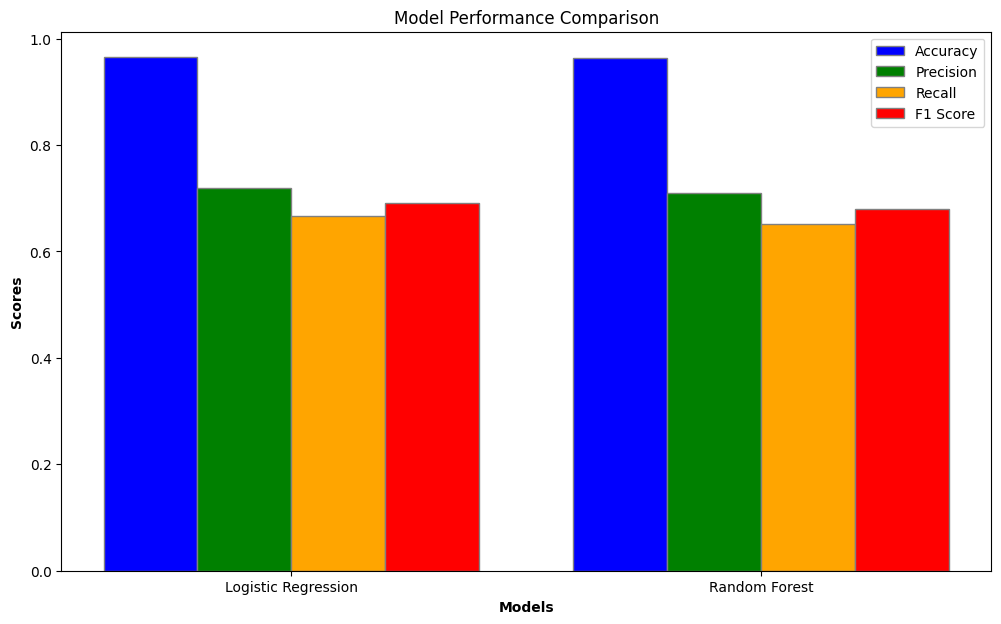

In [68]:
import matplotlib.pyplot as plt
import numpy as np

# Modeller ve performans metrikleri
models = ['Logistic Regression', 'Random Forest']
accuracy = [0.96462, 0.96329]
precision = [0.71954, 0.70927]
recall = [0.66594, 0.65084]
f1_score = [0.69170, 0.67880]

# Bar genişliği
bar_width = 0.2

# X eksenindeki pozisyonlar
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width*2 for x in r1]
r4 = [x + bar_width*3 for x in r1]

# Grafik boyutu
plt.figure(figsize=(12, 7))

# Bar grafiklerini oluştur
plt.bar(r1, accuracy, color='blue', width=bar_width, edgecolor='grey', label='Accuracy')
plt.bar(r2, precision, color='green', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r3, recall, color='orange', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r4, f1_score, color='red', width=bar_width, edgecolor='grey', label='F1 Score')

# Eksenler ve başlık
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + bar_width*1.5 for r in range(len(models))], models)
plt.ylabel('Scores', fontweight='bold')
plt.title('Model Performance Comparison')
plt.legend()

# Grafiği göster
plt.show()


## Algorithms Used
- **Linear Regression**: Chosen as a baseline model for its simplicity and interpretability.
- **XGBoost Regressor**: Selected for its high performance and ability to handle large datasets efficiently.
- **Logistic Regression**: Used for binary classification due to its simplicity and effectiveness.
- **Random Forest Classifier**: Chosen for its robustness and ability to handle complex datasets.

## Model Evaluation
- **Regression Models**
  - Linear Regression: MSE = 0.0471, MAE = 0.1276, R² = 0.1586
  - XGBoost Regressor: MSE = 0.0257, MAE = 0.0498, R² = 0.5406
- **Classification Models**
  - Logistic Regression: Accuracy = 0.9646, Precision = 0.7195, Recall = 0.6659, F1 Score = 0.6917
  - Random Forest Classifier: Accuracy = 0.9633, Precision = 0.7093, Recall = 0.6508, F1 Score = 0.6788

## Conclusion
- The XGBoost Regressor outperformed Linear Regression in predicting the remaining useful life of machines.
- Logistic Regression and Random Forest Classifier both performed well in predicting machine failures within 7 days, with Logistic Regression slightly outperforming Random Forest.
- Future work could include hyperparameter optimization, unsupervised learning, and deploying the model using a web interface.